<a href="https://colab.research.google.com/github/koushikroy/TimeSeriesForecastingProphet/blob/main/Facebook%20Prophet%20my%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings; 
warnings.simplefilter('ignore')

# 0. Install and Import Dependencies

In [2]:
!pip install pystan
!pip install fbprophet

In [3]:
import pandas as pd
from fbprophet import Prophet

# 1. Read in Data and Process Dates

In [13]:
!wget https://raw.githubusercontent.com/koushikroy/time_series_demand_forecast/main/dataset/energy_dataset.csv

--2021-07-24 09:35:51--  https://raw.githubusercontent.com/koushikroy/time_series_demand_forecast/main/dataset/energy_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6273009 (6.0M) [text/plain]
Saving to: ‘energy_dataset.csv’

energy_dataset.csv  100%[===================>]   5.98M  --.-KB/s    in 0.07s   

2021-07-24 09:35:51 (90.4 MB/s) - ‘energy_dataset.csv’ saved [6273009/6273009]



In [14]:
df_original = pd.read_csv('energy_dataset.csv')

In [25]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [15]:
df_original.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [20]:
df_original.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [17]:
df_original.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [19]:
df_original['time'] = pd.to_datetime(df_original['time'])

In [39]:
df = pd.DataFrame()  
df['y'] = df_original['total load actual']
df['ds'] = df_original['time']

In [40]:
len(df_original['time']), len(df_original['total load actual'])

(35064, 35064)

In [37]:
df.dropna(inplace = True)

In [44]:
df['ds'] = pd.to_datetime(df['ds'], utc=True)

In [52]:
df['ds'] = df['ds'].dt.tz_localize(None)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       35028 non-null  float64       
 1   ds      35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 548.0 KB


In [59]:
df.head()

,y,ds
0,25385.0,2014-12-31 23:00:00
1,24382.0,2015-01-01 00:00:00
2,22734.0,2015-01-01 01:00:00
3,21286.0,2015-01-01 02:00:00
4,20264.0,2015-01-01 03:00:00


In [60]:
df.tail()

,y,ds
35059,30653.0,2018-12-31 18:00:00
35060,29735.0,2018-12-31 19:00:00
35061,28071.0,2018-12-31 20:00:00
35062,25801.0,2018-12-31 21:00:00
35063,24455.0,2018-12-31 22:00:00


# 2. Train Model

In [54]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

# 3. Forecast Away

In [55]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-12-31 23:00:00,28588.987719,19380.196765,30094.041375,28588.987719,28588.987719,-3986.415884,-3986.415884,-3986.415884,-3384.144010,-3384.144010,-3384.144010,1008.575497,1008.575497,1008.575497,-1610.847371,-1610.847371,-1610.847371,0.0,0.0,0.0,24602.571835
1,2015-01-01 00:00:00,28588.972854,18111.404407,28248.476624,28588.972854,28588.972854,-5346.755443,-5346.755443,-5346.755443,-4733.277718,-4733.277718,-4733.277718,995.042816,995.042816,995.042816,-1608.520541,-1608.520541,-1608.520541,0.0,0.0,0.0,23242.217411
2,2015-01-01 01:00:00,28588.957989,16746.845189,27742.627115,28588.957989,28588.957989,-6216.231646,-6216.231646,-6216.231646,-5589.907578,-5589.907578,-5589.907578,979.804476,979.804476,979.804476,-1606.128545,-1606.128545,-1606.128545,0.0,0.0,0.0,22372.726343
3,2015-01-01 02:00:00,28588.943124,16973.760181,27190.596824,28588.943124,28588.943124,-6622.285850,-6622.285850,-6622.285850,-5981.692397,-5981.692397,-5981.692397,963.077944,963.077944,963.077944,-1603.671397,-1603.671397,-1603.671397,0.0,0.0,0.0,21966.657274
4,2015-01-01 03:00:00,28588.928259,16969.745183,27761.126924,28588.928259,28588.928259,-6422.191397,-6422.191397,-6422.191397,-5766.144814,-5766.144814,-5766.144814,945.102533,945.102533,945.102533,-1601.149116,-1601.149116,-1601.149116,0.0,0.0,0.0,22166.736863


In [58]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
35159,2019-04-06 22:00:00,29017.233738,19797.693919,30368.285746,28047.350621,30198.246535,-4038.528460,-4038.528460,-4038.528460,-1518.670457,-1518.670457,-1518.670457,-2384.247941,-2384.247941,-2384.247941,-135.610063,-135.610063,-135.610063,0.0,0.0,0.0,24978.705278
35160,2019-04-07 22:00:00,29016.913197,20159.019100,31440.291157,28028.927220,30217.104063,-2963.648561,-2963.648561,-2963.648561,-1518.670457,-1518.670457,-1518.670457,-1191.429107,-1191.429107,-1191.429107,-253.548997,-253.548997,-253.548997,0.0,0.0,0.0,26053.264635
35161,2019-04-08 22:00:00,29016.592655,22656.752052,33371.200963,28003.192508,30227.690989,-1013.988768,-1013.988768,-1013.988768,-1518.670457,-1518.670457,-1518.670457,889.064445,889.064445,889.064445,-384.382757,-384.382757,-384.382757,0.0,0.0,0.0,28002.603886
35162,2019-04-09 22:00:00,29016.272113,22595.685244,33159.222651,27977.457795,30230.523407,-1242.681620,-1242.681620,-1242.681620,-1518.670457,-1518.670457,-1518.670457,801.265019,801.265019,801.265019,-525.276182,-525.276182,-525.276182,0.0,0.0,0.0,27773.590493
35163,2019-04-10 22:00:00,29015.951571,22614.606472,33038.462940,27965.563473,30233.647569,-1171.482422,-1171.482422,-1171.482422,-1518.670457,-1518.670457,-1518.670457,1020.210661,1020.210661,1020.210661,-673.022626,-673.022626,-673.022626,0.0,0.0,0.0,27844.469149


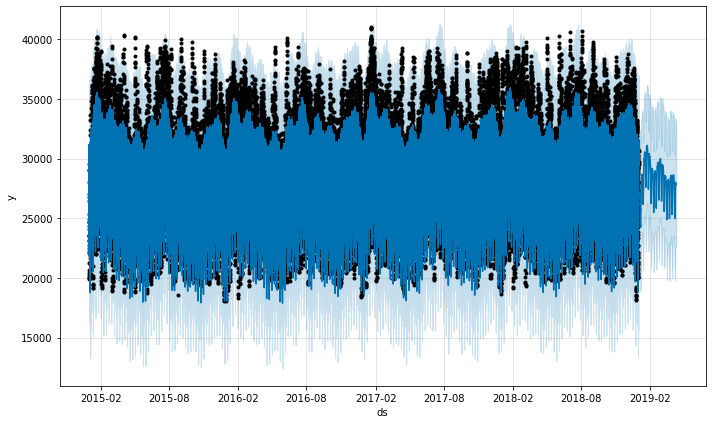

In [63]:
plot1 = m.plot(forecast)

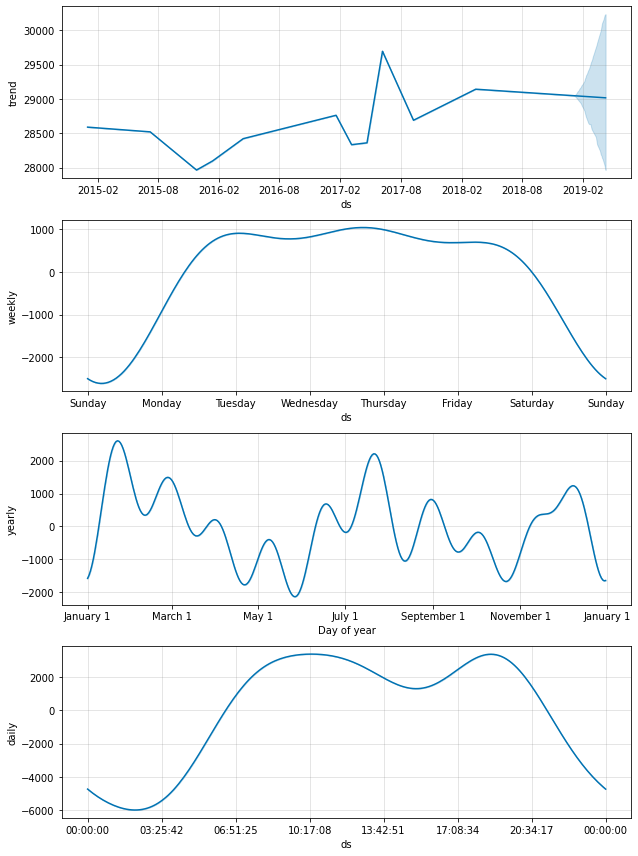

In [57]:
plt2 = m.plot_components(forecast)

In [71]:
import matplotlib.pyplot as plt

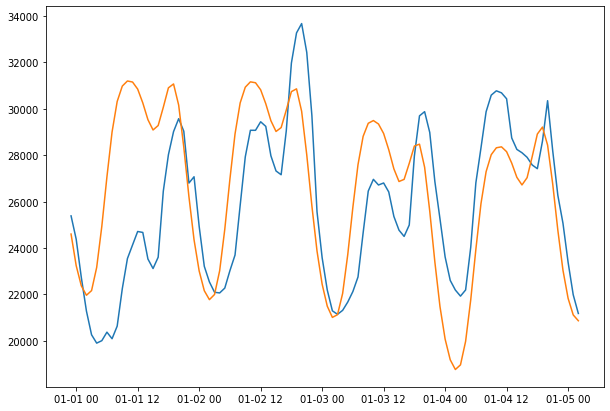

In [75]:
plt.figure(figsize=(10, 7))
plt.plot(df['ds'][:100], df['y'][:100])
plt.plot(forecast['ds'][:100], forecast['yhat'][:100])